# Project Description

<font size="4">This project is about testing wether the addition of an automated call reception service would result in better customer ratings</font>

# Install packages

## <span style="color:red">The next cell is ran only once if you don't have the libraries needed</span>

In [ ]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy

# Import packages

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy

# Read Data

In [2]:
data = pd.read_csv('Data/customerserviceabtestdata.csv')

treatment_data_raw = data[data['AutomatedFlag'].astype(float) == float(1)]
control_data_raw = data[data['AutomatedFlag'].astype(float) == float(0)]

In [3]:
treatment_data_raw.head()

,RecordID,Phone Number,AutomatedFlag,CS Rating
0,1,(733) 308-5171,1,2
4,5,(224) 126-2105,1,4
10,11,(504) 714-6056,1,2
11,12,(344) 668-4779,1,4
12,13,(203) 736-4156,1,1


In [4]:
control_data_raw.head()

,RecordID,Phone Number,AutomatedFlag,CS Rating
1,2,(737) 479-9819,0,5
2,3,(571) 837-6630,0,4
3,4,(746) 481-2200,0,5
5,6,(586) 442-9226,0,1
6,7,(494) 893-3812,0,5


# Variables

In [6]:
user_identifier = 'Phone Number'
control_columns = ['AutomatedFlag']
target_column = 'CS Rating'

all_columns = control_columns.copy()
all_columns.append(target_column)
all_columns.append(user_identifier)

print('User Identifier Column\n{}\n'.format(user_identifier))
print('Control Columns\n{}\n'.format(control_columns))
print('Target Column\n{}\n'.format(target_column))
print('All Columns\n{}\n'.format(all_columns))

User Identifier Column
Phone Number

Control Columns
['AutomatedFlag']

Target Column
CS Rating

All Columns
['AutomatedFlag', 'CS Rating', 'Phone Number']



# Data Exploration

### Checking intersection of control and treatment sets

In [7]:
control_data_raw[control_data_raw[user_identifier].isin(treatment_data_raw[user_identifier])]

,RecordID,Phone Number,AutomatedFlag,CS Rating


### Check data duplication

In [8]:
treatment_data_raw[treatment_data_raw.duplicated(subset=[user_identifier])]

,RecordID,Phone Number,AutomatedFlag,CS Rating


In [9]:
control_data_raw[control_data_raw.duplicated(subset=[user_identifier])]

,RecordID,Phone Number,AutomatedFlag,CS Rating
138,139,(571) 837-6630,0,5
386,387,(197) 374-6775,0,2
549,550,(561) 682-8993,0,4
712,713,(494) 893-3812,0,1
750,751,(197) 709-4054,0,4
943,944,(131) 231-3793,0,2
985,986,(257) 998-4039,0,3
997,998,(546) 286-7815,0,3


# Clean Data

### Dealing with duplicate `Phone Number` column values

In [14]:
treatment_data = treatment_data_raw[all_columns].groupby([user_identifier], as_index=False).mean().drop([user_identifier], axis=1)

control_data = control_data_raw[all_columns].groupby([user_identifier], as_index=False).mean().drop([user_identifier], axis=1)

In [15]:
treatment_data

,AutomatedFlag,CS Rating
0,1,5
1,1,5
2,1,5
3,1,2
4,1,2
...,...,...
242,1,5
243,1,1
244,1,2
245,1,1


In [16]:
control_data

,AutomatedFlag,CS Rating
0,0.0,1.0
1,0.0,2.0
2,0.0,2.0
3,0.0,1.0
4,0.0,3.0
...,...,...
740,0.0,4.0
741,0.0,1.0
742,0.0,1.0
743,0.0,3.0


# Calculating Difference

In [70]:
difference = scipy.stats.ttest_ind(a=treatment_data, b=control_data, equal_var=True)

# Results

In [71]:
print(difference)

Ttest_indResult(statistic=array([       inf, 1.90263872]), pvalue=array([0.        , 0.05737763]))


<font size="4">The p-value is above 0.05, which suggests there isn’t enough evidence to say that the automated system affects the CS score. However, due to the low sample size, I would suggest to conduct the experiment again for a longer period of time to gather more data.</font>

In [ ]:
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
 
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center')

treatment_data: mean= 3.2550607287449393, sigma= 1.3806608145793504
control_data: mean= 3.059731543624161, sigma= 1.4040034666217622


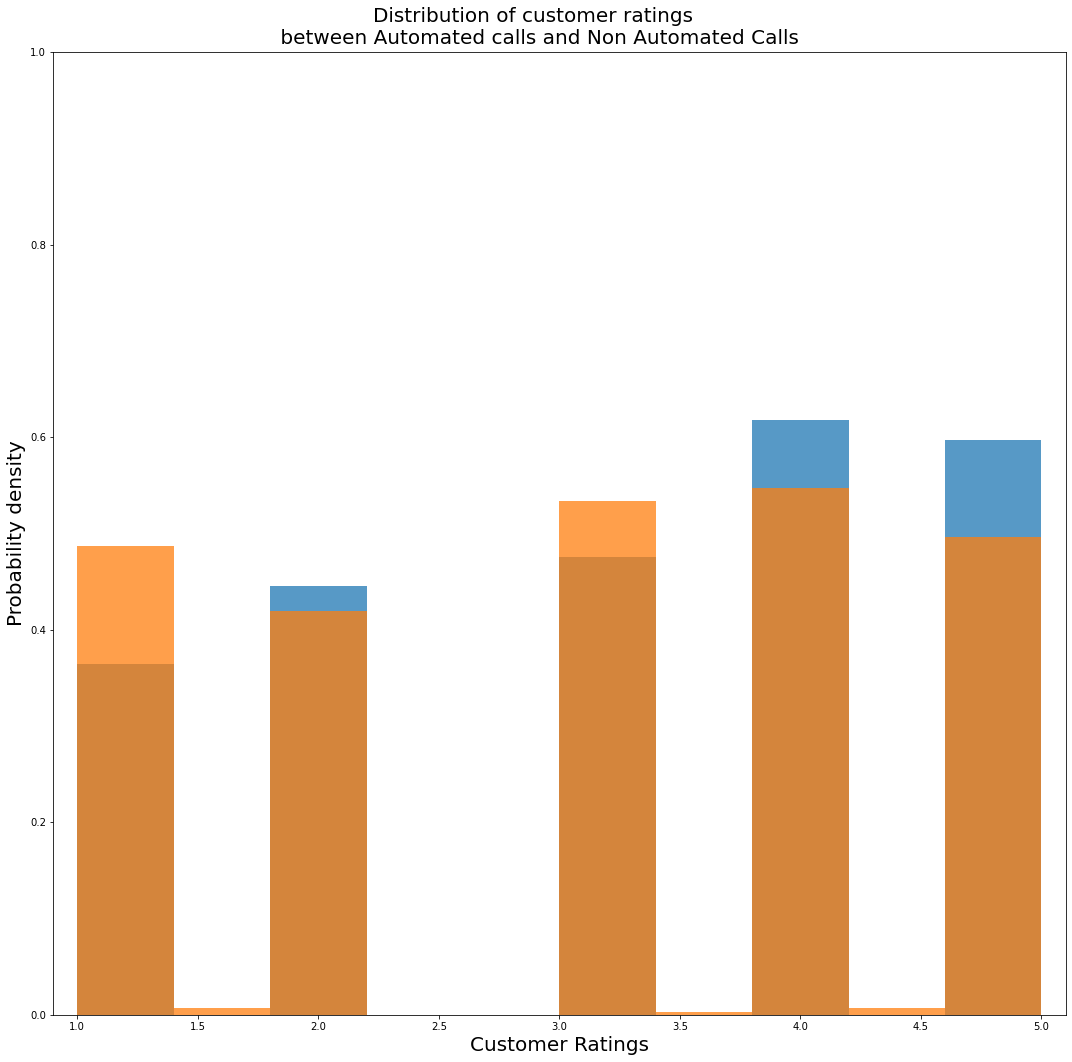

In [62]:
fig = plt.figure(figsize= (15, 15))


Automated = plt.hist(treatment_data['CS Rating'], label= "Automated",
                     density= True,
                     alpha=0.75)
Not_Automated = plt.hist(control_data['CS Rating'], label= "Not Automated",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of customer ratings \n between Automated calls and Non Automated Calls", fontsize= 20)
plt.xlabel("Customer Ratings", fontsize= 20)
plt.ylabel("Probability density", fontsize= 20)

plt.xlim(0.9,5.1)
plt.ylim(0, 1.0)

plt.tight_layout()

print('treatment_data: mean= {}, sigma= {}'.format(treatment_data['CS Rating'].mean(), treatment_data['CS Rating'].std()))
print('control_data: mean= {}, sigma= {}'.format(control_data['CS Rating'].mean(), control_data['CS Rating'].std()))

<font size="4">As mentioned above the p-value is above 0.05 and as seen in the above probability distribution the difference can be attributed to the random nature of the tests, since the difference in the probability distribution is not substantial.</font>

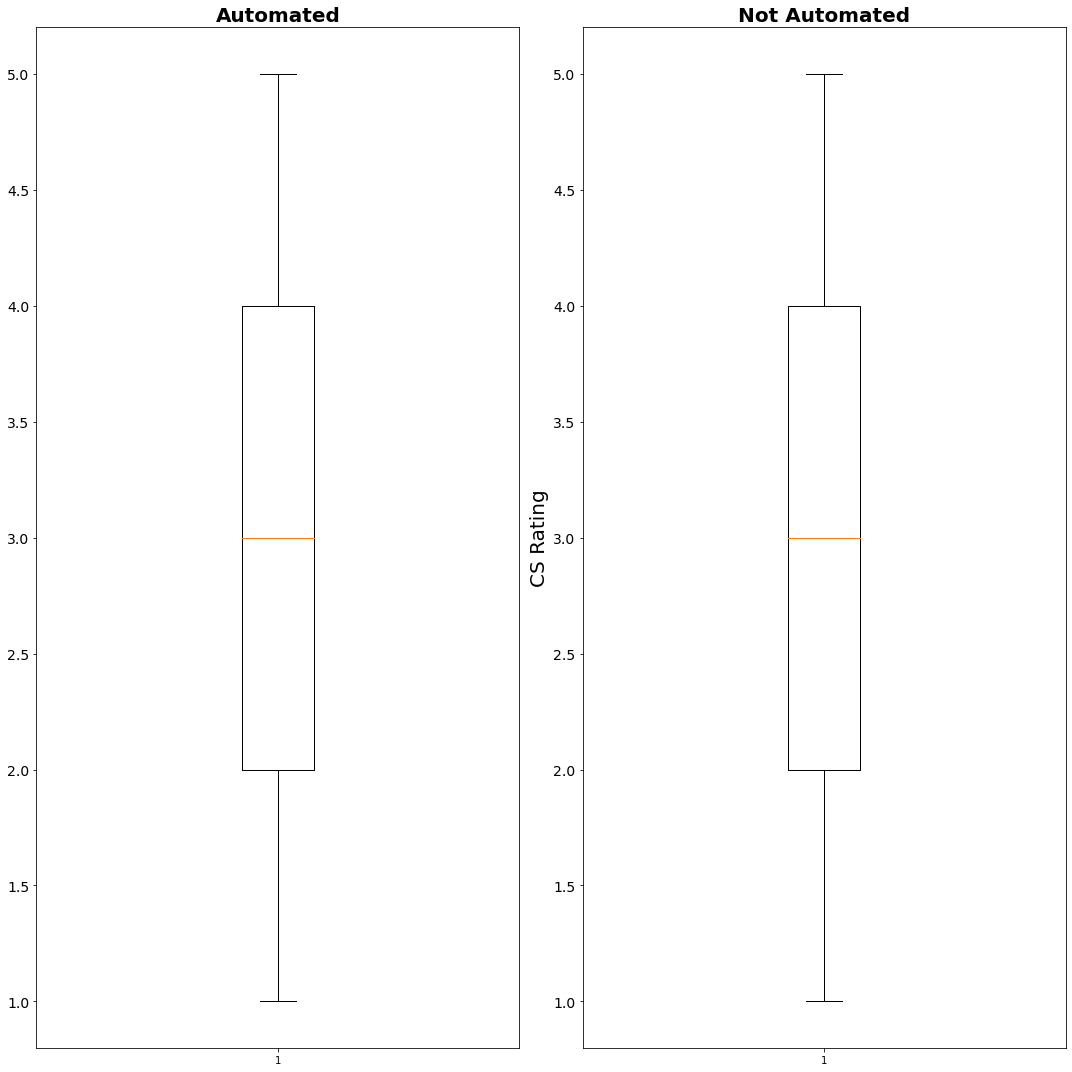

In [68]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].boxplot(treatment_data['CS Rating'], flierprops=red_circle)
axs[0].set_title('Automated', fontsize=20, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=14)

axs[1].boxplot(control_data['CS Rating'], flierprops=red_circle)
axs[1].set_title('Not Automated', fontsize=20, fontweight='bold')
axs[1].tick_params(axis='y', labelsize=14)

plt.ylabel("CS Rating", fontsize= 20)
    
plt.tight_layout()

<font size="4">Here the mean and population distribution can be seen for both the `Automated` and `Not Automated` datasets and as can be seen there is no substantial difference in the selected measuring criteria</font>